# Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Arrumando o dataset

In [2]:
df = pd.read_csv("dataset.csv")
# Dropando tuplas com valores NaN
df = df.dropna()
n,c = df.shape
df.index = range(553)

# Set de todos os generos possiveis
set_generos = set()
for linha in df["Gêneros"]:
  for genero in linha.replace(" ","").split(","):
    set_generos.add(genero)

lista_generos = list(set_generos)
qnt_generos = len(lista_generos)

# Criando uma matriz para os generos como atributos
# 1 = filme possui o genero, 0 = filme não possui o genero
matriz = np.zeros(shape = (n,qnt_generos))
for i in range(n):
  linha = df.at[i,"Gêneros"]
  for genero in linha.replace(" ","").split(","):
    coluna = lista_generos.index(genero)
    matriz[i,coluna] = 1

# Criando o X e Y
X = pd.DataFrame( data = matriz, columns = lista_generos )
X["Ano"] = df["Ano"]
X["Votacoes"] = df["Votacoes"]
X["Metascore"] = df["Metascore"]
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df["Nota"]

# Visualização rápida do X
print(X.head(5))

print()

# Dados estatísticos sobre o y
print(y.describe())

   Animation  History  Thriller  Action  Romance  Family  Comedy  Crime  \
0        1.0      0.0       0.0     1.0      0.0     0.0     0.0    0.0   
1        0.0      0.0       1.0     1.0      0.0     0.0     0.0    1.0   
2        0.0      0.0       0.0     1.0      0.0     0.0     1.0    0.0   
3        0.0      0.0       0.0     1.0      0.0     0.0     1.0    0.0   
4        0.0      1.0       0.0     0.0      0.0     0.0     0.0    1.0   

   Western  Adventure  ...  Sport  Horror  Sci-Fi  Biography  Music  Musical  \
0      0.0        1.0  ...    0.0     0.0     0.0        0.0    0.0      0.0   
1      0.0        0.0  ...    0.0     0.0     0.0        0.0    0.0      0.0   
2      0.0        1.0  ...    0.0     0.0     0.0        0.0    0.0      0.0   
3      0.0        1.0  ...    0.0     0.0     0.0        0.0    0.0      0.0   
4      0.0        0.0  ...    0.0     0.0     0.0        0.0    0.0      0.0   

   Fantasy  Ano  Votacoes  Metascore  
0      0.0  1.0  0.035653   0

# Regularização, Treino e Teste

In [3]:
# 80% Treino, 20% Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)


# Regressão Linear
model1 = LinearRegression()
# Treino
model1.fit(X_treino,y_treino)
# Teste
y_pred1 = model1.predict(X_teste)


# Random Forest Regressor
model2 = RandomForestRegressor(random_state = 1)

# Testar os seguintes parametros para o random forest
n_base = []
for i in range(10, 201, 10):
  n_base.append(i)
max_prof = []
for i in range(4, 11, 2):
  max_prof.append(i)

param_grid = {
    'n_estimators': n_base,
    'max_depth': max_prof,
}
# Validação
grid_search = GridSearchCV(model2, param_grid, cv=5)
grid_search.fit(X_treino, y_treino)
best_model = grid_search.best_estimator_
# Treino
best_model.fit(X_treino,y_treino)
# Teste
y_pred2 = best_model.predict(X_teste)

# Resultados

## Valores

In [4]:
# Comparando os modelos
comparacao = pd.DataFrame()
comparacao["Real"] = y_teste
comparacao["Reg Linear"] = y_pred1
comparacao["Reg RF"] = y_pred2
# Descrição das comparacoes
print(comparacao.describe())
print()
print("----------------------")
print()
# Visualização das comparacoes
print(comparacao.head(15))
print()
print("----------------------")
print()

# Métricas dos testes
reg_linear_mse, reg_linear_mae = mean_squared_error(y_teste, y_pred1), mean_absolute_error(y_teste, y_pred1)
RF_reg_mse, RF_reg_mae = mean_squared_error(y_teste, y_pred2), mean_absolute_error(y_teste, y_pred2)
print("MSE Regressão Linear:", reg_linear_mse)
print("MAE Regressão Linear:", reg_linear_mae)
print()
print("----------------------")
print()
print("MSE Random Forest:", RF_reg_mse)
print("MAE Random Forest:", RF_reg_mae)

             Real  Reg Linear      Reg RF
count  111.000000  111.000000  111.000000
mean     7.517117    7.516003    7.523434
std      0.623024    0.518569    0.457768
min      6.300000    6.563619    6.749885
25%      7.100000    7.112926    7.183238
50%      7.500000    7.383833    7.437804
75%      7.900000    7.771991    7.852707
max      9.400000    9.667565    8.698708

----------------------

     Real  Reg Linear    Reg RF
304   6.7    7.019218  6.992646
247   8.3    8.123188  8.296460
65    7.6    7.294900  7.732152
237   8.2    7.882846  7.888566
548   7.2    7.363835  7.527285
524   6.4    7.162081  7.232241
124   7.3    7.271578  7.504191
218   7.1    7.043202  7.032800
324   6.5    7.471098  6.960185
350   7.3    7.765865  7.995536
411   7.1    7.306516  7.421339
403   7.6    8.079765  7.838679
395   7.3    7.294215  7.365237
291   7.1    7.502121  7.399601
232   6.9    6.927440  6.950092

----------------------

MSE Regressão Linear: 0.15867651857419696
MAE Regressão Line

## Graficos

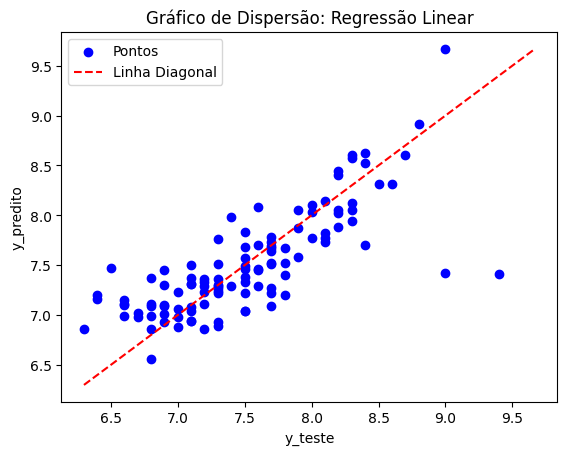

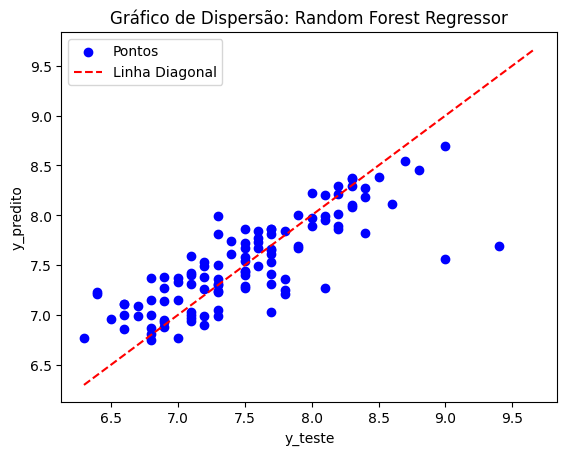

In [5]:
plt.scatter(y_teste, y_pred1, color='b', label='Pontos')
plt.xlabel('y_teste')
plt.ylabel('y_predito')
plt.title('Gráfico de Dispersão: Regressão Linear')
min_value = min(min(y_teste), min(y_pred1))
max_value = max(max(y_teste), max(y_pred1))
plt.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='r', label='Linha Diagonal')
plt.legend()
plt.show()

print()

plt.scatter(y_teste, y_pred2, color='b', label='Pontos')
plt.xlabel('y_teste')
plt.ylabel('y_predito')
plt.title('Gráfico de Dispersão: Random Forest Regressor')
min_value = min(min(y_teste), min(y_pred1))
max_value = max(max(y_teste), max(y_pred1))
plt.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='r', label='Linha Diagonal')
plt.legend()
plt.show()